<a href="https://colab.research.google.com/github/manthilaw/Python-Projects/blob/main/Exploring_the_Bitcoin_Cryptocurrency_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bitcoin. Cryptocurrencies. So hot right now.

Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future1. In fact, on the 6th of December of 2017, Bitcoin has a market capitalization above $200 billion.

*1 WARNING: The cryptocurrency market is exceptionally volatile2 and any money you put in might disappear into thin air. Cryptocurrencies mentioned here might be scams similar to Ponzi Schemes or have many other issues (overvaluation, technical, etc.). Please do not mistake this for investment advice. *

2 Update on March 2020: Well, it turned out to be volatile indeed :D

That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named datasets/coinmarketcap_06122017.csv.

In [3]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = pd.read_csv('/content/drive/MyDrive/Python CSV/1.Exploring the Bitcoin Cryptocurrency Market/coinmarketcap_06122017.csv')
# Printing out the first few lines
current.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


# 2. Full dataset, filtering, and reproducibility
The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV we conveniently saved on the 6th of December of 2017 using the API call


In [4]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_col  = current[['id','market_cap_usd']]

# Counting the number of values
count_values = market_cap_col.count()
print(count_values)

id                1326
market_cap_usd    1031
dtype: int64


**3. Discard the cryptocurrencies without a market capitalization**

Why do the count() for id and market_cap_usd differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.

In [5]:
# Filtering out rows without a market capitalization
cap = market_cap_col.query('market_cap_usd > 0')

**4. How big is Bitcoin compared with the rest of the cryptocurrencies?**

At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

Text(0, 0.5, '% of total cap')

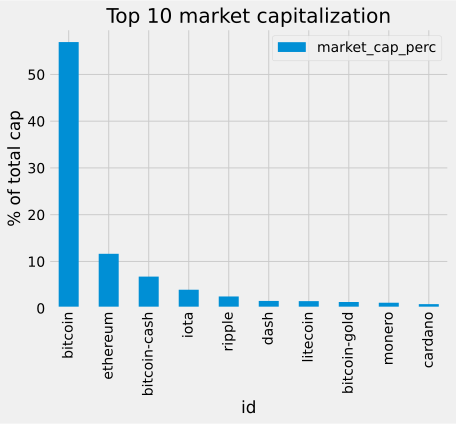

In [6]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index(cap.id[:10])

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc =
                    lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above 
ax = cap10.plot.bar(x = 'id', y = 'market_cap_perc', title = TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
ax.set_ylabel(TOP_CAP_YLABEL)